# __Working with Image Data__


## Steps to be followed:
1. Import the necessary libraries
2. Read and display the image
3. Display RGB channels
4. Flip augmentation
5. Perform width shifting augmentation
6. Change the brightness augmentation

### Step 1: Import the necessary libraries
- Import the required libraries.

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline

### Step 2: Read and display the image
- Read an image file named **leopard.jpg** using the imread function from the **io** module.
- Create a subplot figure with one plot.
- Display the image on the plot using the **imshow** function from the pyplot module.

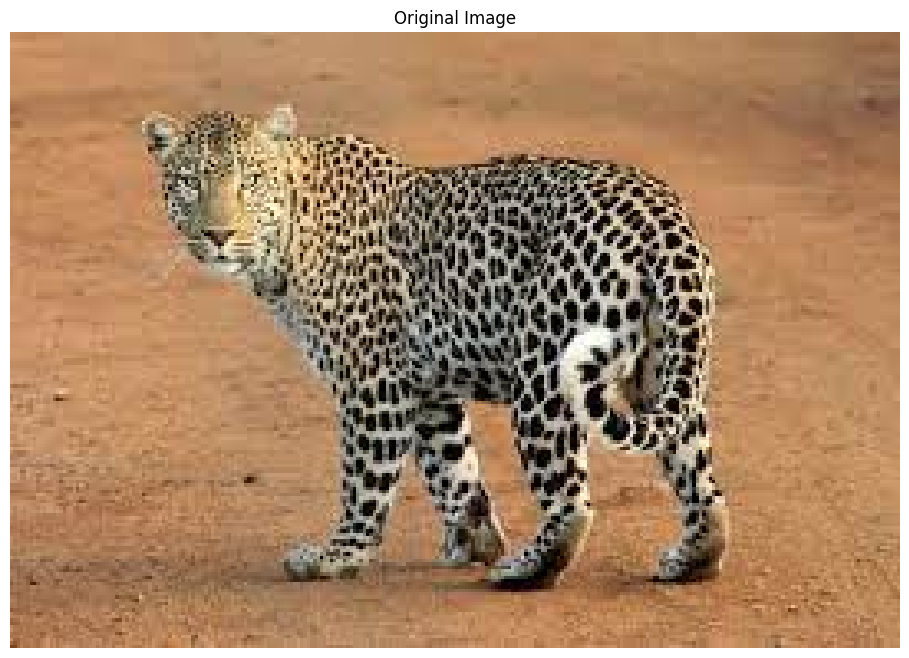

In [6]:
image = io.imread('leopard.jpg')
plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.axis('off')  # Hide the axis
plt.title("Original Image")
plt.show()

__Observation:__
- The output is a plot showing the original image.

### Step 3: Display RGB channels

- The code constructs a comprehensive visual representation of an original image alongside its isolated RGB channels, enhancing understanding of color composition in digital images.

- Utilizes a single row of four subplots within a 20 by 5-inch figure, ensuring side-by-side display of each image and its color components for easy comparison.

- The first subplot prominently displays the original image in full color, serving as a reference point for subsequent RGB channel isolations.

- The second subplot focuses on the red channel, showing only the red components. Areas high in red appear bright, while areas without red appear black, highlighting the distribution of red hues.

- The third subplot isolates and displays the green channel. It emphasizes areas predominantly green, with brightness variations indicating the strength of green in the original image.

- The fourth subplot is dedicated to the blue channel, illustrating the presence and intensity of blue colors, aiding in analyzing parts of the image where blue is dominant.

- Each color channel (red, green, blue) is isolated by zeroing out the other two channels for each respective color, ensuring clear visualization of each primary color's contribution to the overall image.

- Each subplot is accurately labeled—original image, red channel, green channel, and blue channel—enhancing the educational quality of the visualization.

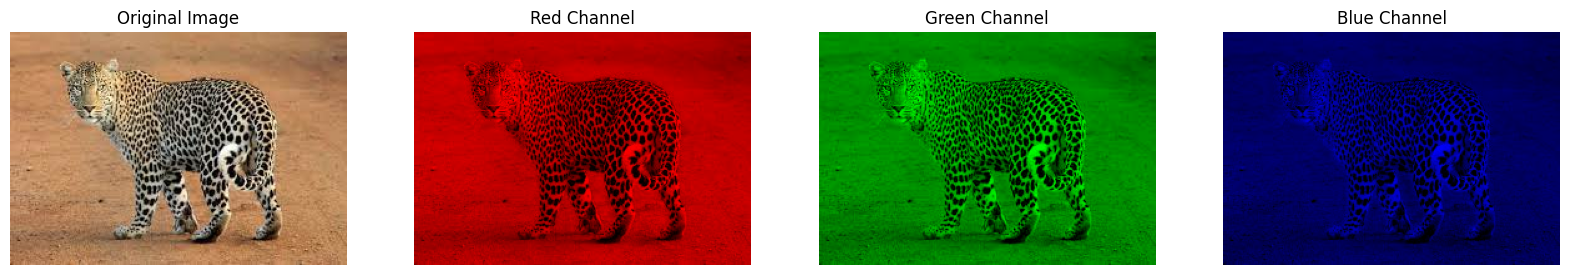

In [7]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
titles = ['Original Image', 'Red Channel', 'Green Channel', 'Blue Channel']

# Display the original image
axes[0].imshow(image)
axes[0].set_title(titles[0])
axes[0].axis('off')

# Function to isolate color channels
def isolate_channel(image, color_idx):
    # Create a zero matrix of the same shape as the image
    channel_image = np.zeros_like(image)
    # Copy the appropriate color channel's values into the matrix
    channel_image[:,:,color_idx] = image[:,:,color_idx]
    return channel_image

# Display Red Channel
red_image = isolate_channel(image, 0)  # Red channel is index 0
axes[1].imshow(red_image)
axes[1].set_title(titles[1])
axes[1].axis('off')

# Display Green Channel
green_image = isolate_channel(image, 1)  # Green channel is index 1
axes[2].imshow(green_image)
axes[2].set_title(titles[2])
axes[2].axis('off')

# Display Blue Channel
blue_image = isolate_channel(image, 2)  # Blue channel is index 2
axes[3].imshow(blue_image)
axes[3].set_title(titles[3])
axes[3].axis('off')

plt.show()


__Observation:__
- The output is a figure with four subplots showing the original image and its RGB channels.

### Step 4: Flip augmentation

- The function display_augmented_images showcases a flipping augmentation technique, where images can be flipped horizontally and vertically.
- Utilizes TensorFlow's tf.expand_dims to add an extra dimension to the image array, preparing it for processing in batch form.
- An ImageDataGenerator is configured with horizontal_flip=True and vertical_flip=True to enable both horizontal and vertical flipping of the images.
- The flow method of the ImageDataGenerator object (datagen) is called with the expanded image array and a batch size of 1. This method generates a batch of augmented images.
- A matplotlib figure with a subplot grid of 1 row and 3 columns is created, measuring 15 inches by 5 inches, to display three instances of augmented images.
- A loop runs three times to generate and display the augmented images. In each iteration of the loop:

    - The next method is called on the iterator (it) to retrieve the next batch of augmented images.
    - The augmented image, retrieved as the first element of the batch, is converted to unsigned 8-bit integers (uint8) for proper display.
    - Each image is displayed in its respective subplot using plt.imshow, with axis labels turned off for cleaner visualization.

- ImageDataGenerator is instantiated with two parameters: horizontal_flip=True and vertical_flip=True.
- This setup configures the generator to augment images by randomly flipping them horizontally and/or vertically. Horizontal flipping mirrors the image along its vertical axis, while vertical flipping mirrors it along its horizontal axis




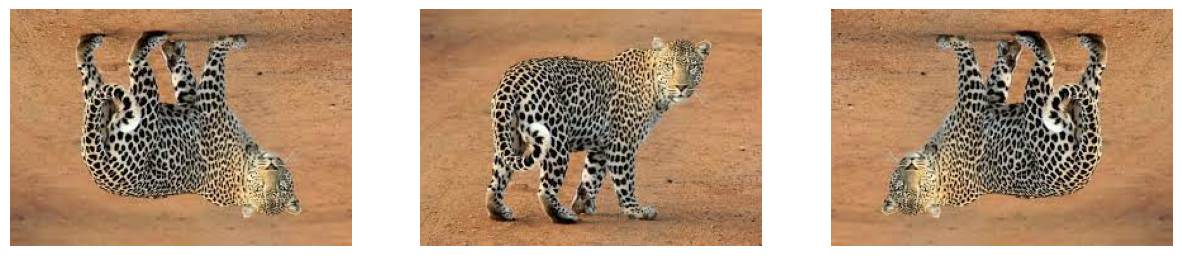

In [8]:
def display_augmented_images(datagen, image):
    samples = tf.expand_dims(image, 0)  # Expand image dimensions
    it = datagen.flow(samples, batch_size=1)
    plt.figure(figsize=(15, 5))
    for i in range(3):
        plt.subplot(1, 3, i + 1)
        batch = next(it)
        img = batch[0].astype('uint8')
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# Apply flip augmentation
flip_datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
display_augmented_images(flip_datagen, image)

__Observation:__
- The code generates and displays three flipped versions of the original image using horizontal and vertical flipping.

### Step 5: Perform width shifting augmentation
- ImageDataGenerator is initialized with a width_shift_range parameter set to [-200, 200].
- This parameter configures the generator to randomly shift the input image horizontally by a distance measured in pixels. The range [-200, 200] means the image can be shifted horizontally up to 200 pixels left or right. The specific shift value for each augmented image is randomly selected from this range during the augmentation process.

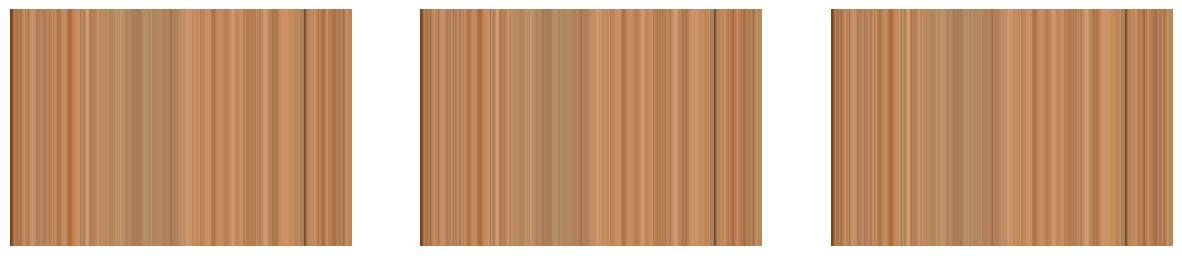

In [9]:
# Perform width shifting augmentation
width_shift_datagen = ImageDataGenerator(width_shift_range=[-200, 200])
display_augmented_images(width_shift_datagen, image)

__Observation:__
- The code generates and displays three horizontally shifted versions of the original image within the specified range **[-200, 200]**.

### Step 6: Change the brightness augmentation
- An ImageDataGenerator is created with a brightness_range parameter set to [0.5, 2.0].
- This parameter defines the range within which the brightness of the image will be randomly adjusted. A factor of 0.5 will make the image up to twice as dark, and a factor of 2.0 will make the image up to twice as bright. The actual brightness modification applied to each image generated will vary randomly within this range.

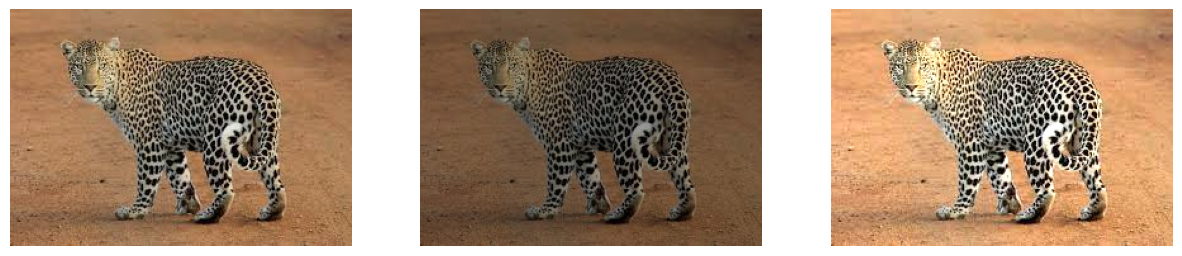

In [10]:
# Change brightness augmentation
brightness_datagen = ImageDataGenerator(brightness_range=[0.5, 2.0])
display_augmented_images(brightness_datagen, image)

__Observation:__
- The code generates and displays three brightness-augmented versions of the original image within the specified brightness range __[0.5, 2.0]__.